<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/05/2024
</span>

<a id='top'></a>
# *Advanced Text analysis in Python - Supervised ML*




## Table of Contents

1. [Naive Bayes](#naive)<br>
2. [Support Vector Machine](#svm)
3. [KNN](#knn)
4. [Decision treees](#dt)
5. [Random Forest](#rf)

<a id=''></a>
## Mock data ([to top](#))
>


In [1]:
sports_texts = [
    "The game was exciting and the team played well.",
    "He scored a goal in the last minute of the match.",
    "The championship game was a huge success.",
    "The player was awarded the best athlete of the year.",
    "The coach strategized brilliantly to win the match.",
    "The referee made a controversial decision during the game.",
    "Fans were thrilled by the player's performance.",
    "The tournament featured several outstanding matches.",
    "The athlete set a new record in the competition.",
    "The team's defense was solid throughout the game."
]

technology_texts = [
    "The new smartphone model was released last week.",
    "The software update improved the performance of the device.",
    "The tech conference showcased the latest innovations.",
    "Artificial intelligence is transforming various industries.",
    "The company launched a groundbreaking new gadget.",
    "The latest laptop model features a powerful processor.",
    "The startup developed an innovative mobile application.",
    "Blockchain technology is revolutionizing finance.",
    "The device comes with an enhanced security system.",
    "The company invested heavily in research and development."
]


<a id=''></a>
## Load libraries ([to top](#))
>
`scikit-learn` is a free and open-source machine learning library for the Python programming language.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords


<a id=''></a>
## Pre-processing ([to top](#))
>
Python’s `zip()` function is defined as zip(*iterables). The function takes in iterables as arguments and returns an iterator. This iterator generates a series of tuples containing elements from each iterable. zip() can accept any type of iterable, such as files, lists, tuples, dictionaries, sets, and so on.
>


In [3]:
# For number of sentences in each text, we create the same number of labels
labels = ['sports'] * len(sports_texts) + ['technology'] * len(technology_texts)

# Combine both texts
texts = sports_texts + technology_texts

# Combine texts and labels
combined = list(zip(texts, labels))
# Shuffle data
random.shuffle(combined)
texts, labels = zip(*combined)

# Convert labels to binary format
label_dict = {'sports': 0, 'technology': 1}
y = np.array([label_dict[label] for label in labels])

We split data into training and test sets. The optimal split ratio depends on various factors. The rough standard for train-validation-test splits is 60-80% training data, 10-20% validation data, and 10-20% test data.
>X_train: The training set features (documents for training).
>
>X_test: The test set features (documents for testing).
>
>y_train: The training set labels (corresponding to X_train).
>
>y_test: The test set labels (corresponding to X_test).


`CountVectorizer`: This is a class from the `sklearn.feature_extraction.text` module that converts a collection of text documents to a matrix of token counts.
>
`fit_transform`: This method performs two operations:
>
>fit: It learns the vocabulary dictionary of all tokens in the raw documents.
>
>transform: It transforms the documents into a document-term matrix.

In [4]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.25, random_state=42)

# Define NLTK English stop words
english_stop_words = set(stopwords.words('english'))

# Fit and Transform Training Data
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
#Fit and Transform Training Data to TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 
X_test_counts = count_vect.transform(X_test)
# Transform Test Data to TF-IDF
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

<a id='naive'></a>
## Naive Bayes ([to top](#naive))
>
Naive Bayes is a probabilistic classifier based on Bayes' theorem with the ``naive" assumption of independence among features

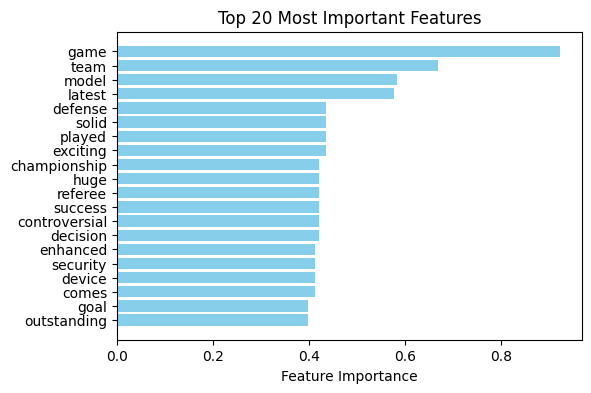

In [5]:
# Train Naive Bayes model
nb_clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Extract feature names
feature_names = count_vect.get_feature_names_out()

# Get the feature log probabilities for each class
log_probabilities = nb_clf.feature_log_prob_

# Calculate the feature importance scores as absolute differences between class log probabilities
feature_importance = np.abs(log_probabilities[1] - log_probabilities[0])

# Sort feature importance scores in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the top N most important features
N = 20
plt.figure(figsize=(6, 4))
plt.barh(range(N), sorted_feature_importance[:N], color='skyblue')
plt.yticks(range(N), sorted_feature_names[:N])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Let's also plot a confusion matrix to check the model’s 
predictions compared to the actual labes : 

>We see that There is 1 instance of sports correctly classified as "sports".
>
>There are 2 FN for "sports" class, which are actually sports but predicted as technology.
>
>There are 0 FP for the "technology" class, which are actually technology but predicted as sports.
>
>There are 2 instaces of "technology" correctly classified as technology.s

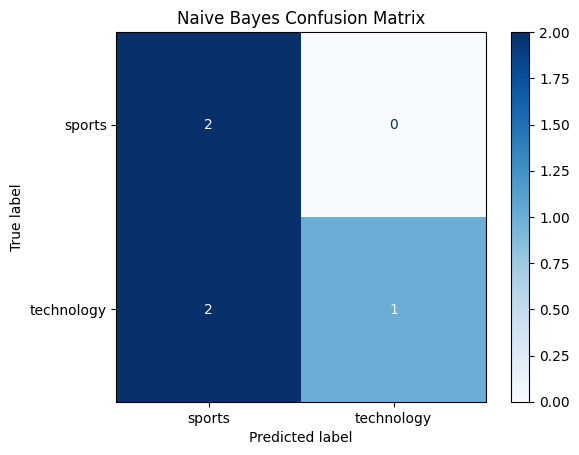

In [6]:
y_pred_nb = nb_clf.predict(X_test_tfidf)
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['sports', 'technology'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

<a id='svm'></a>
## Support Vector Machine ([to top](#svm))
>
SVMs are often employed for tasks like document categorization and text classification, where they find an optimal hyperplane to separate different classes.
>
>Decision boundary: The contour line separating the blue and red regions.
>
>Blue regions indicate "Sports".
>
>Blue dots correspond to actual data point of "sports" class.
>
>Blue dots within red regions indicate misclassifications by the model.
>

In [7]:
from sklearn.decomposition import TruncatedSVD

# Reduce dimensions to 2D for visualization
svd = TruncatedSVD(n_components=2, random_state=42)
X_train_2d = svd.fit_transform(X_train_tfidf)
X_test_2d = svd.transform(X_test_tfidf)


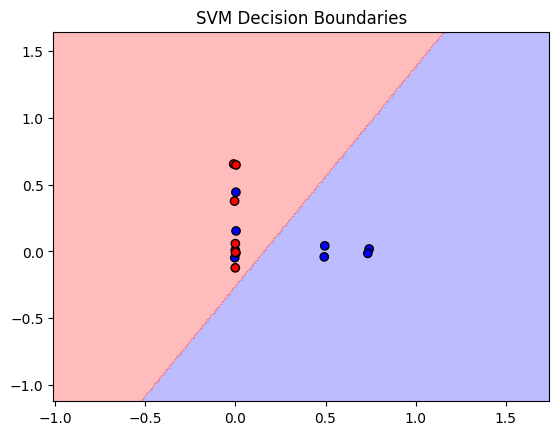

In [8]:
# Plotting function
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.show()

# Train SVM model
svm_clf_2d = SVC(kernel='linear').fit(X_train_2d, y_train)
# SVM Scatter Plot
plot_decision_boundaries(X_train_2d, y_train, svm_clf_2d, "SVM Decision Boundaries")

In [9]:
from sklearn.metrics import f1_score
# Predict on training data
y_pred = svm_clf_2d.predict(X_train_2d)

# Calculate F1 score
f1 = f1_score(y_train, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.78


<a id='knn'></a>
## KNN ([to top](#knn))
>
KNN is a simple algorithm that classifies data points based on the majority class of their nearest neighbours. 

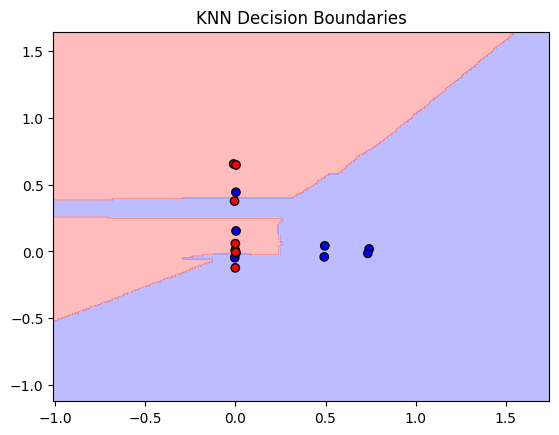

In [10]:
# Train KNN model
knn_clf_2d = KNeighborsClassifier(n_neighbors=3).fit(X_train_2d, y_train)
# KNN Scatter Plot
plot_decision_boundaries(X_train_2d, y_train, knn_clf_2d, "KNN Decision Boundaries")


In [11]:
# Predict on training data
y_pred = knn_clf_2d.predict(X_train_2d)

# Calculate F1 score
f1 = f1_score(y_train, y_pred)
print(f"Our F1 Score improved a little bit here: {f1:.2f}")

Our F1 Score improved a little bit here: 0.67


<a id='dt'></a>
## Decision Tree ([to top](#dt))
>
>
The decision tree's depth and number of splits can be controlled by hyperparameters such as max_depth, min_samples_split, and min_samples_leaf. By default, decision trees in scikit-learn are not pruned, meaning they will continue to split until each leaf is pure or until each leaf contains a minimum number of samples specified by min_samples_split or min_samples_leaf.

Each square includes:

>Gini Impurity
>
>Total number of samples
>
>value (a vector which represents how the data points are distributed in terms of their classes. For instance, [7,8] means there are 7 data points with label 1, 8 data points with label 2.)
>
>dominant class for the subset of training data at the node.

Root node:

> A gini impurity of 0.5 from the root node indicates that the samples at this node are evenly distributed between the two classes (sports and technology).
> 
> The threshold value of <= 0.1888 for the feature "game" means that the data is split into two subsets based on whether the value of the "game" feature is less than or equal to 0.1888. Samples with "game" values less than or equal to this threshold go to one branch, while samples with "game" values greater than the threshold go to the other branch.
>
> The Gini impurity at this split is 0.4, indicating less impurity compared to the root node.
> 
> The predicted class at this split is also "technology."
>
Second split:
> gini=0.4  indicates some impurity, but the majority class is "technology" 
>
> gini=0 means that this node is pure, containing only samples from one class.

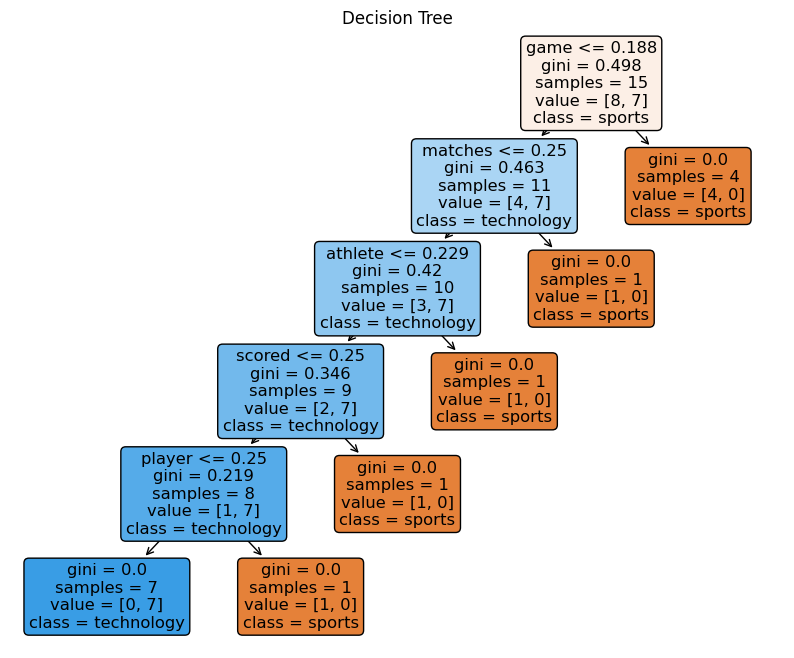

In [12]:
# Train Decision Tree model on original data
dt_clf_full = DecisionTreeClassifier(random_state=42).fit(X_train_tfidf, y_train)

# Plot the Decision Tree
plt.figure(figsize=(10,8))
plot_tree(dt_clf_full, filled=True, feature_names=count_vect.get_feature_names_out(), class_names=['sports', 'technology'], rounded=True)
plt.title("Decision Tree")
plt.show()

<a id='rf'></a>
## Random Forest ([to top](#rf))
>


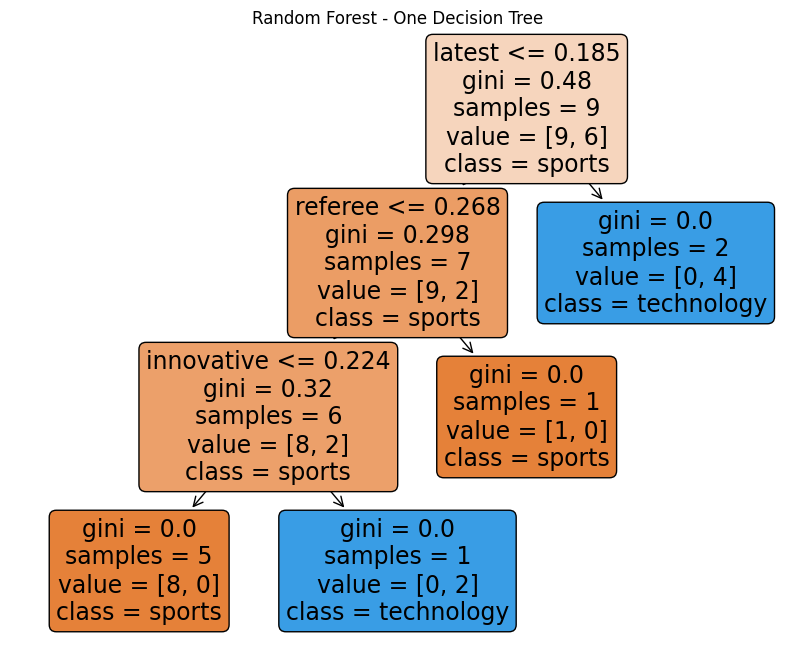

In [13]:
# Train Random Forest model on original data
rf_clf_full = RandomForestClassifier(random_state=42).fit(X_train_tfidf, y_train)

# Plot one of the trees from the Random Forest
plt.figure(figsize=(10,8))
plot_tree(rf_clf_full.estimators_[0], filled=True, feature_names=count_vect.get_feature_names_out(), class_names=['sports', 'technology'], rounded=True)
plt.title("Random Forest - One Decision Tree")
plt.show()